## LOAN ELIGIBILITY MODEL

- To accurately predict whether an applicant is eligible for a loan based on their financial and personal information, thereby helping financial institutions make informed lending decisions.
 Below is the Lifecycle of the prject;

  - Data collection | Data Cleaning | Exploratory Data Analysis | Feature Engineering | Data Splitting | Model Selection | Model Training | Model Evaluation 

- Import basic dependencies

In [173]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# %matplotlib inline

- Reading and Exploring The Dataset

In [174]:
loan = pd.read_csv('Loan_Approval_Dataset.csv')

In [175]:
loan

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [176]:
loan.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [177]:
loan.shape

(614, 13)

In [178]:
loan.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [179]:
loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [180]:
# Checking for the NaN Values

loan.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [181]:
loan.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


## Data Cleaning & Exploratory Data Analysis

Text(0.5, 1.0, 'Graphical Representation of Outliers of the Dataset')

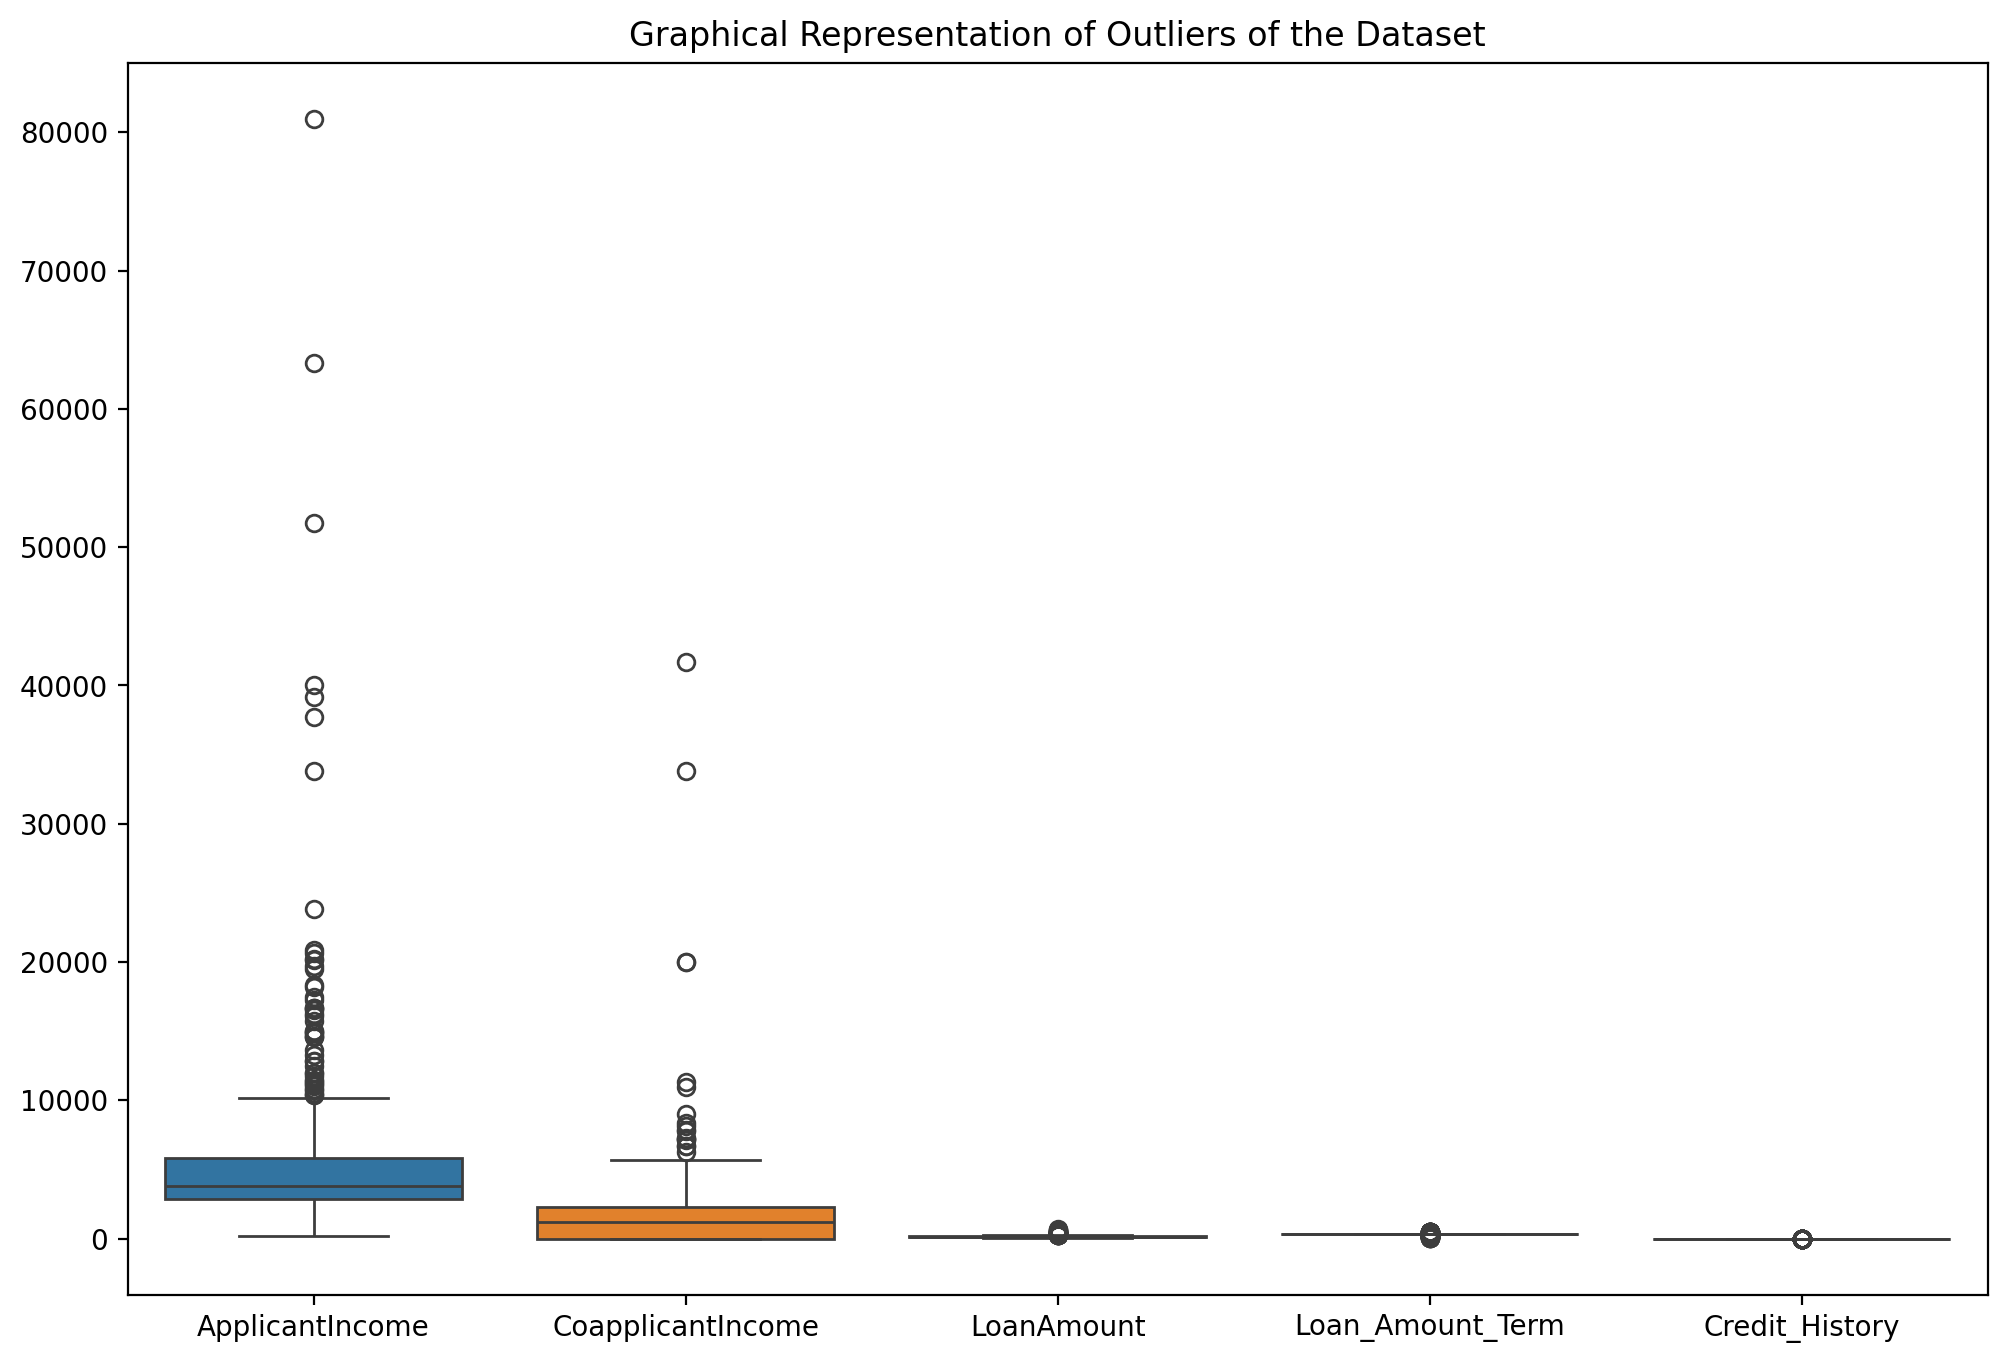

In [182]:
 # Checking for outliers in the dataset

plt.figure(figsize=(12, 8), dpi  = 200)
sns.boxplot(data = loan)
plt.title('Graphical Representation of Outliers of the Dataset')

In [183]:
 # Filling the NaN Values of the Numerical Datatype mean and median respectively

loan['LoanAmount'] = loan['LoanAmount'].fillna(loan['LoanAmount'].median())
loan['Loan_Amount_Term'] = loan['Loan_Amount_Term'].fillna(loan['Loan_Amount_Term'].mean())
loan['Credit_History'] = loan['Credit_History'].fillna(loan['Credit_History'].mean())

In [184]:
# The Index of the Male Gender
loan['Gender'].mode()[0]

'Male'

In [185]:
# The Index of the Married category
loan['Married'].mode()[0]

'Yes'

In [186]:
loan['Dependents'].mode()[0]

'0'

In [187]:
loan['Education'].mode()[0]

'Graduate'

In [189]:
loan['Self_Employed'].mode()[0]

'No'

In [190]:
loan['Property_Area'].mode()[0]

'Semiurban'

In [191]:
loan['Loan_Status'].mode()[0]

'Y'

In [192]:
 # Filling the NaN Values of the Object Datatype with the mode of the feature

loan['Gender'] = loan['Gender'].fillna(loan['Gender'].mode()[0])
loan['Married'] = loan['Married'].fillna(loan['Married'].mode()[0])
loan['Dependents'] = loan['Dependents'].fillna(loan['Dependents'].mode()[0])
loan['Education'] = loan['Education'].fillna(loan['Education'].mode()[0])
loan['Self_Employed'] = loan['Self_Employed'].fillna(loan['Self_Employed'].mode()[0])
loan['Property_Area'] = loan['Property_Area'].fillna(loan['Property_Area'].mode()[0])
loan['Loan_Status'] = loan['Loan_Status'].fillna(loan['Loan_Status'].mode()[0])

In [193]:
# Checking for NaN values again
loan.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [194]:
# Number of people who took loan by gender
print('Number of people who took loan by gender:')
loan['Gender'].value_counts()

Number of people who took loan by gender:


Male      502
Female    112
Name: Gender, dtype: int64

Text(0.5, 1.0, 'Number of people who took loan by Gender')

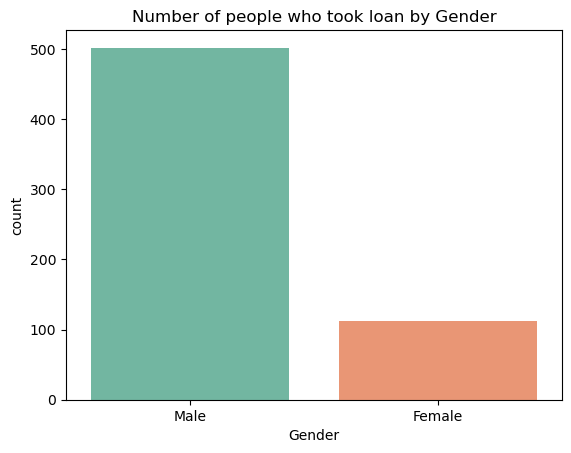

In [195]:
# Graphical Representation of the number of people who took loan by Gender

sns.countplot(data = loan, x= 'Gender', palette = 'Set2')
plt.title('Number of people who took loan by Gender')

In [196]:
# Number of Married people who took loan 
print('Number of Married people who took loan:')
loan['Married'].value_counts()

Number of Married people who took loan:


Yes    401
No     213
Name: Married, dtype: int64

Text(0.5, 1.0, 'Number of Married people who took loan')

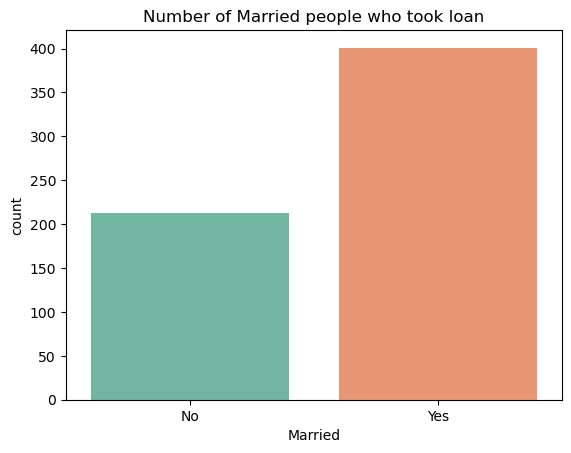

In [197]:
sns.countplot(data = loan, x= 'Married', palette = 'Set2')
plt.title('Number of Married people who took loan')

In [198]:
# Number of Dependent people who took loan 
print('Number of Dependent people who took loan:')
loan['Dependents'].value_counts()

Number of Dependent people who took loan:


0     360
1     102
2     101
3+     51
Name: Dependents, dtype: int64

Text(0.5, 1.0, 'Number of Dependent people who took loan')

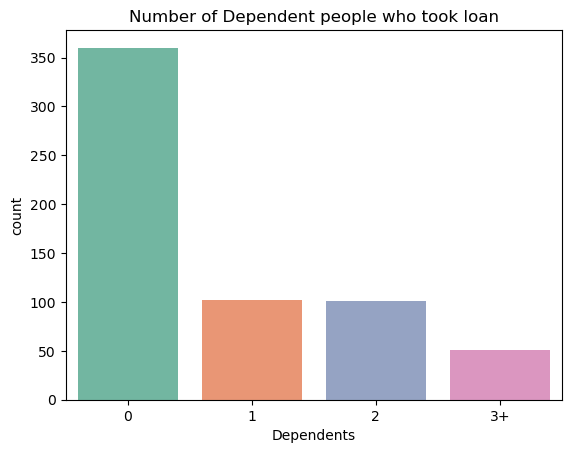

In [199]:
sns.countplot(data = loan, x= 'Dependents', palette = 'Set2')
plt.title('Number of Dependent people who took loan')

In [200]:
# Number of Educated people who took loan 
print('Number of Educated people who took loan:')
loan['Education'].value_counts()

Number of Educated people who took loan:


Graduate        480
Not Graduate    134
Name: Education, dtype: int64

Text(0.5, 1.0, 'Number of Educated people who took loan')

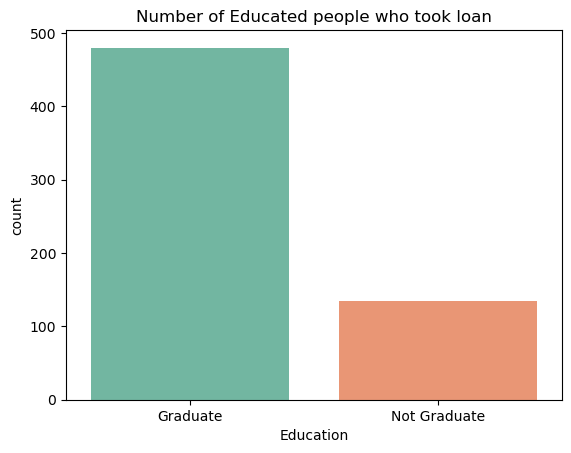

In [201]:
sns.countplot(data = loan, x= 'Education', palette = 'Set2')
plt.title('Number of Educated people who took loan')

In [202]:
# Correlation of the features in the dataset

loan.corr()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
ApplicantIncome,1.000000,-0.116605,0.565181,-0.045242,-0.014477
CoapplicantIncome,-0.116605,1.000000,0.189218,-0.059675,-0.001665
LoanAmount,0.565181,0.189218,1.000000,0.039235,-0.007031
Loan_Amount_Term,-0.045242,-0.059675,0.039235,1.000000,0.001395
Credit_History,-0.014477,-0.001665,-0.007031,0.001395,1.000000


Text(0.5, 1.0, 'The Correlation of the Features in the Dataset')

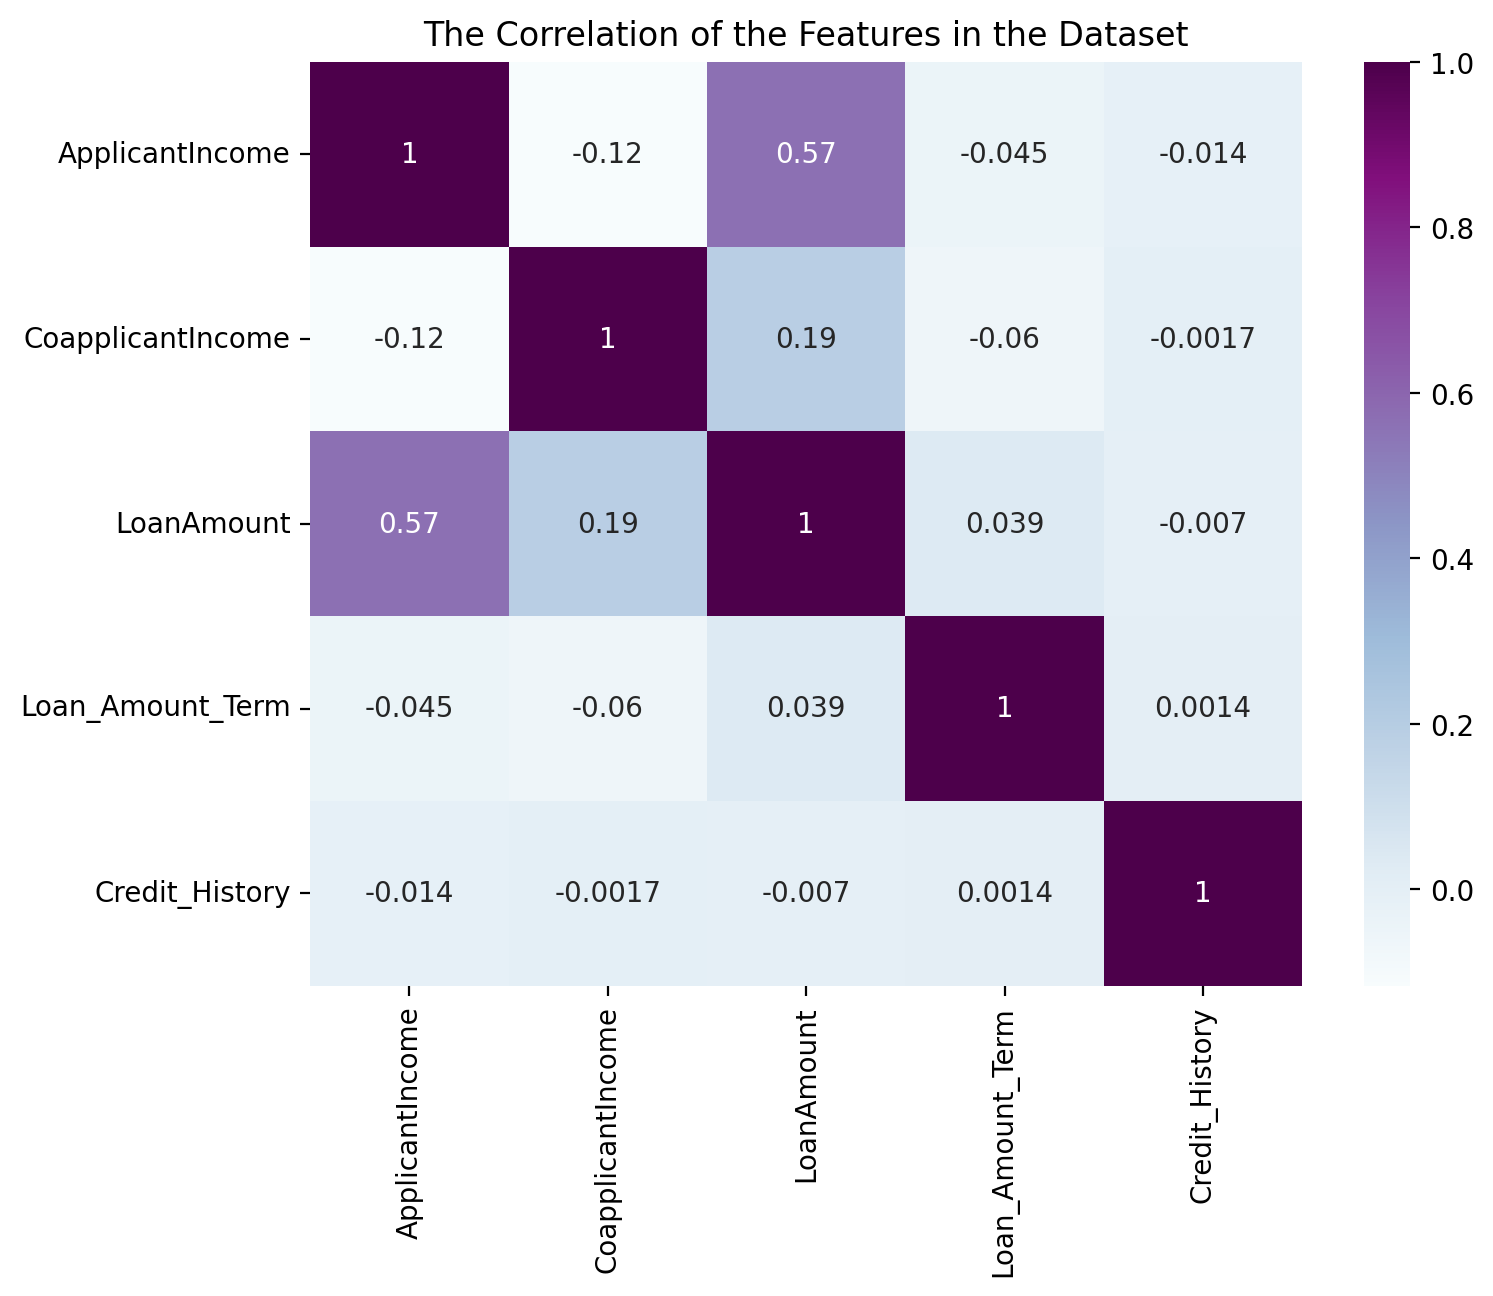

In [203]:
plt.figure(figsize = (8,6), dpi = 200)
sns.heatmap(loan.corr(), annot = True, cmap = 'BuPu')
plt.title('The Correlation of the Features in the Dataset')

- Normalization

In [204]:
# Creating a New Column/features called Applicant Income called ''Total Income'.

loan['Total Income'] = loan['ApplicantIncome'] + loan['CoapplicantIncome']

In [205]:
loan

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Total Income
0,LP001002,Male,No,0,Graduate,No,5849,0.0,128.0,360.0,1.0,Urban,Y,5849.0
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N,6091.0
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y,3000.0
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y,4941.0
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y,6000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y,2900.0
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y,4106.0
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y,8312.0
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y,7583.0


- Applying Log Transformation

In [206]:
loan['ApplicantIncomLog'] = np.log(loan['ApplicantIncome'] + 1)

In [208]:
loan['ApplicantIncomLog']

0      8.674197
1      8.430327
2      8.006701
3      7.857094
4      8.699681
         ...   
609    7.972811
610    8.320448
611    8.996280
612    8.933796
613    8.430327
Name: ApplicantIncomLog, Length: 614, dtype: float64

Text(0.5, 1.0, 'Distribution of the ApplicantIncomeLog')

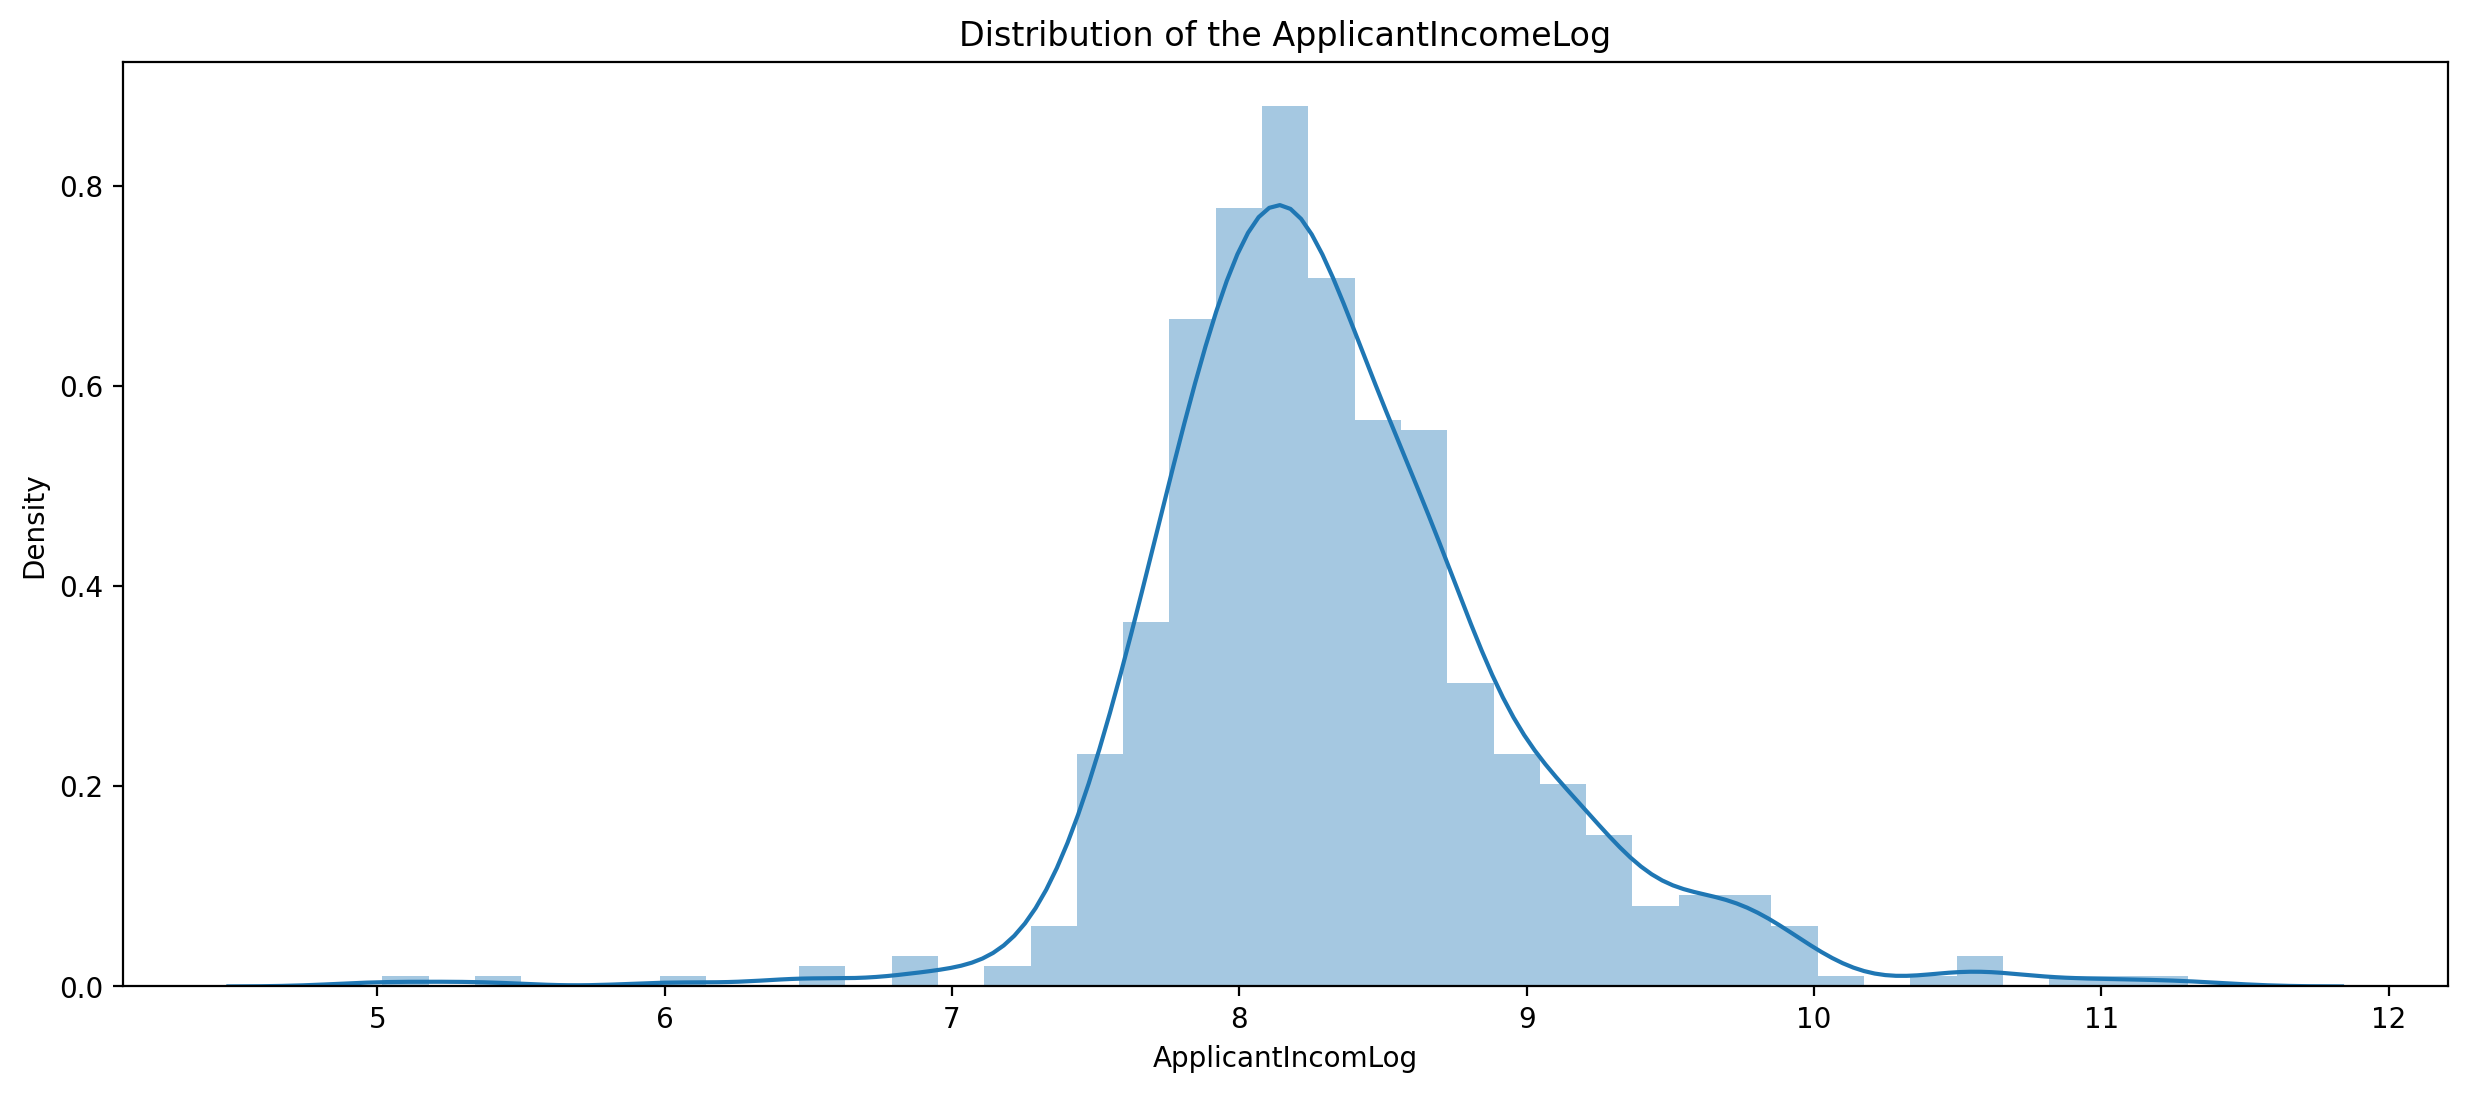

In [209]:
plt.figure(figsize= (15, 6), dpi = 200)
sns.distplot(loan['ApplicantIncomLog'])
plt.title('Distribution of the ApplicantIncomeLog')

In [210]:
# Normalizing the LoanAmount feature
loan['LoanAmountLog'] = np.log(loan['LoanAmount'] + 1)

In [211]:
loan['LoanAmountLog'] 

0      4.859812
1      4.859812
2      4.204693
3      4.795791
4      4.955827
         ...   
609    4.276666
610    3.713572
611    5.537334
612    5.236442
613    4.897840
Name: LoanAmountLog, Length: 614, dtype: float64

Text(0.5, 1.0, 'Distribution of the LoanAmountLog')

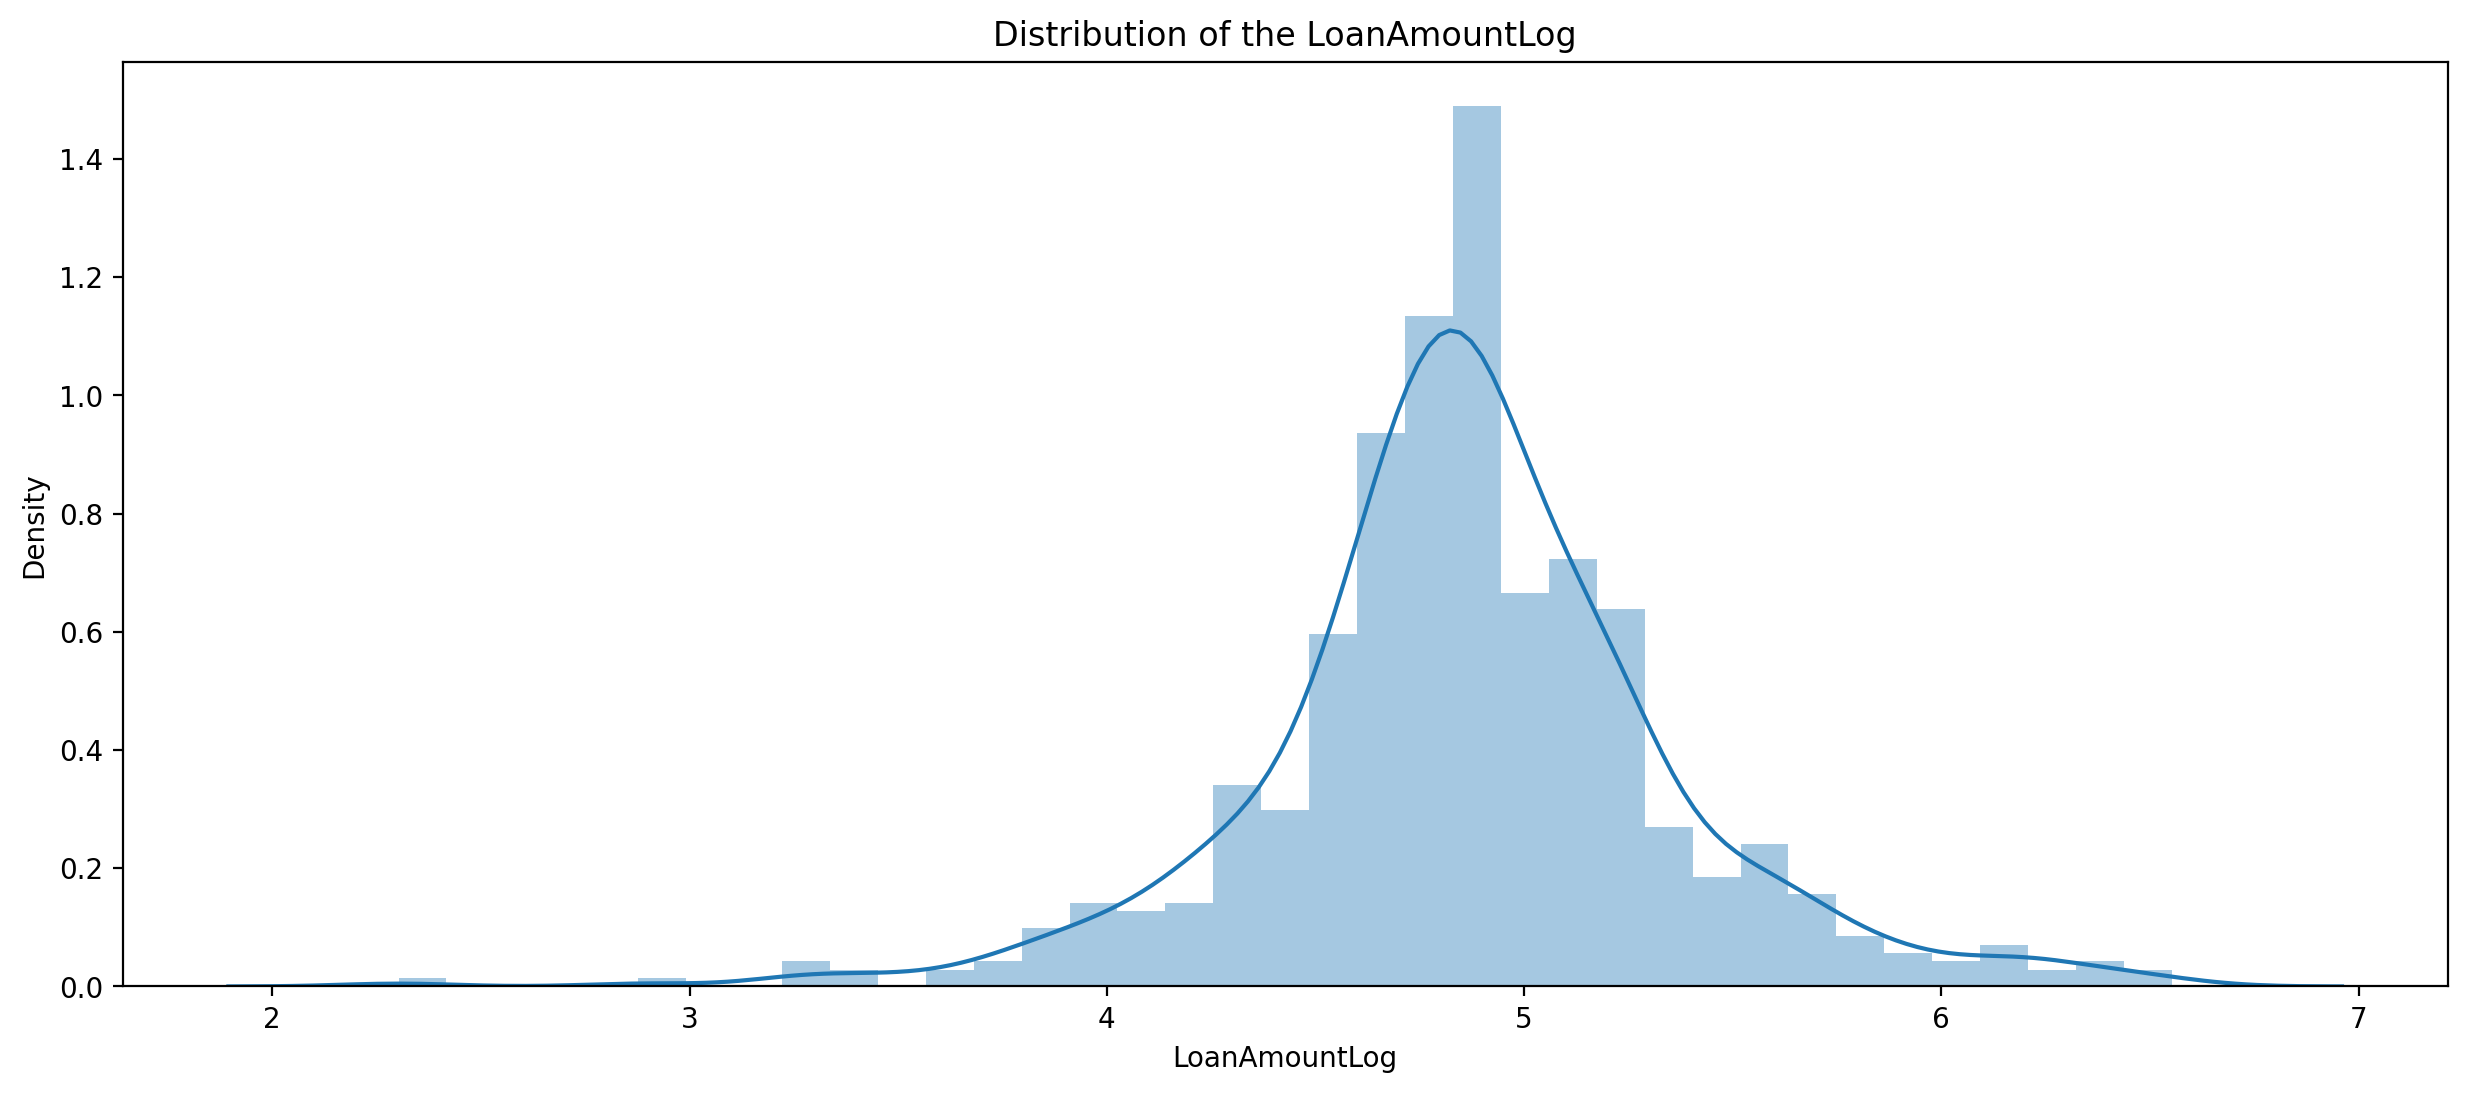

In [212]:
plt.figure(figsize= (15, 6), dpi = 200)
sns.distplot(loan['LoanAmountLog'])
plt.title('Distribution of the LoanAmountLog')

In [213]:
# Normalizing the LoanAmount feature
loan['Loan_Amount_Term_Log'] = np.log(loan['Loan_Amount_Term'] + 1)

In [214]:
loan['Loan_Amount_Term_Log']

0      5.888878
1      5.888878
2      5.888878
3      5.888878
4      5.888878
         ...   
609    5.888878
610    5.198497
611    5.888878
612    5.888878
613    5.888878
Name: Loan_Amount_Term_Log, Length: 614, dtype: float64

Text(0.5, 1.0, 'Distribution of the Loan_Amount_Term_Log')

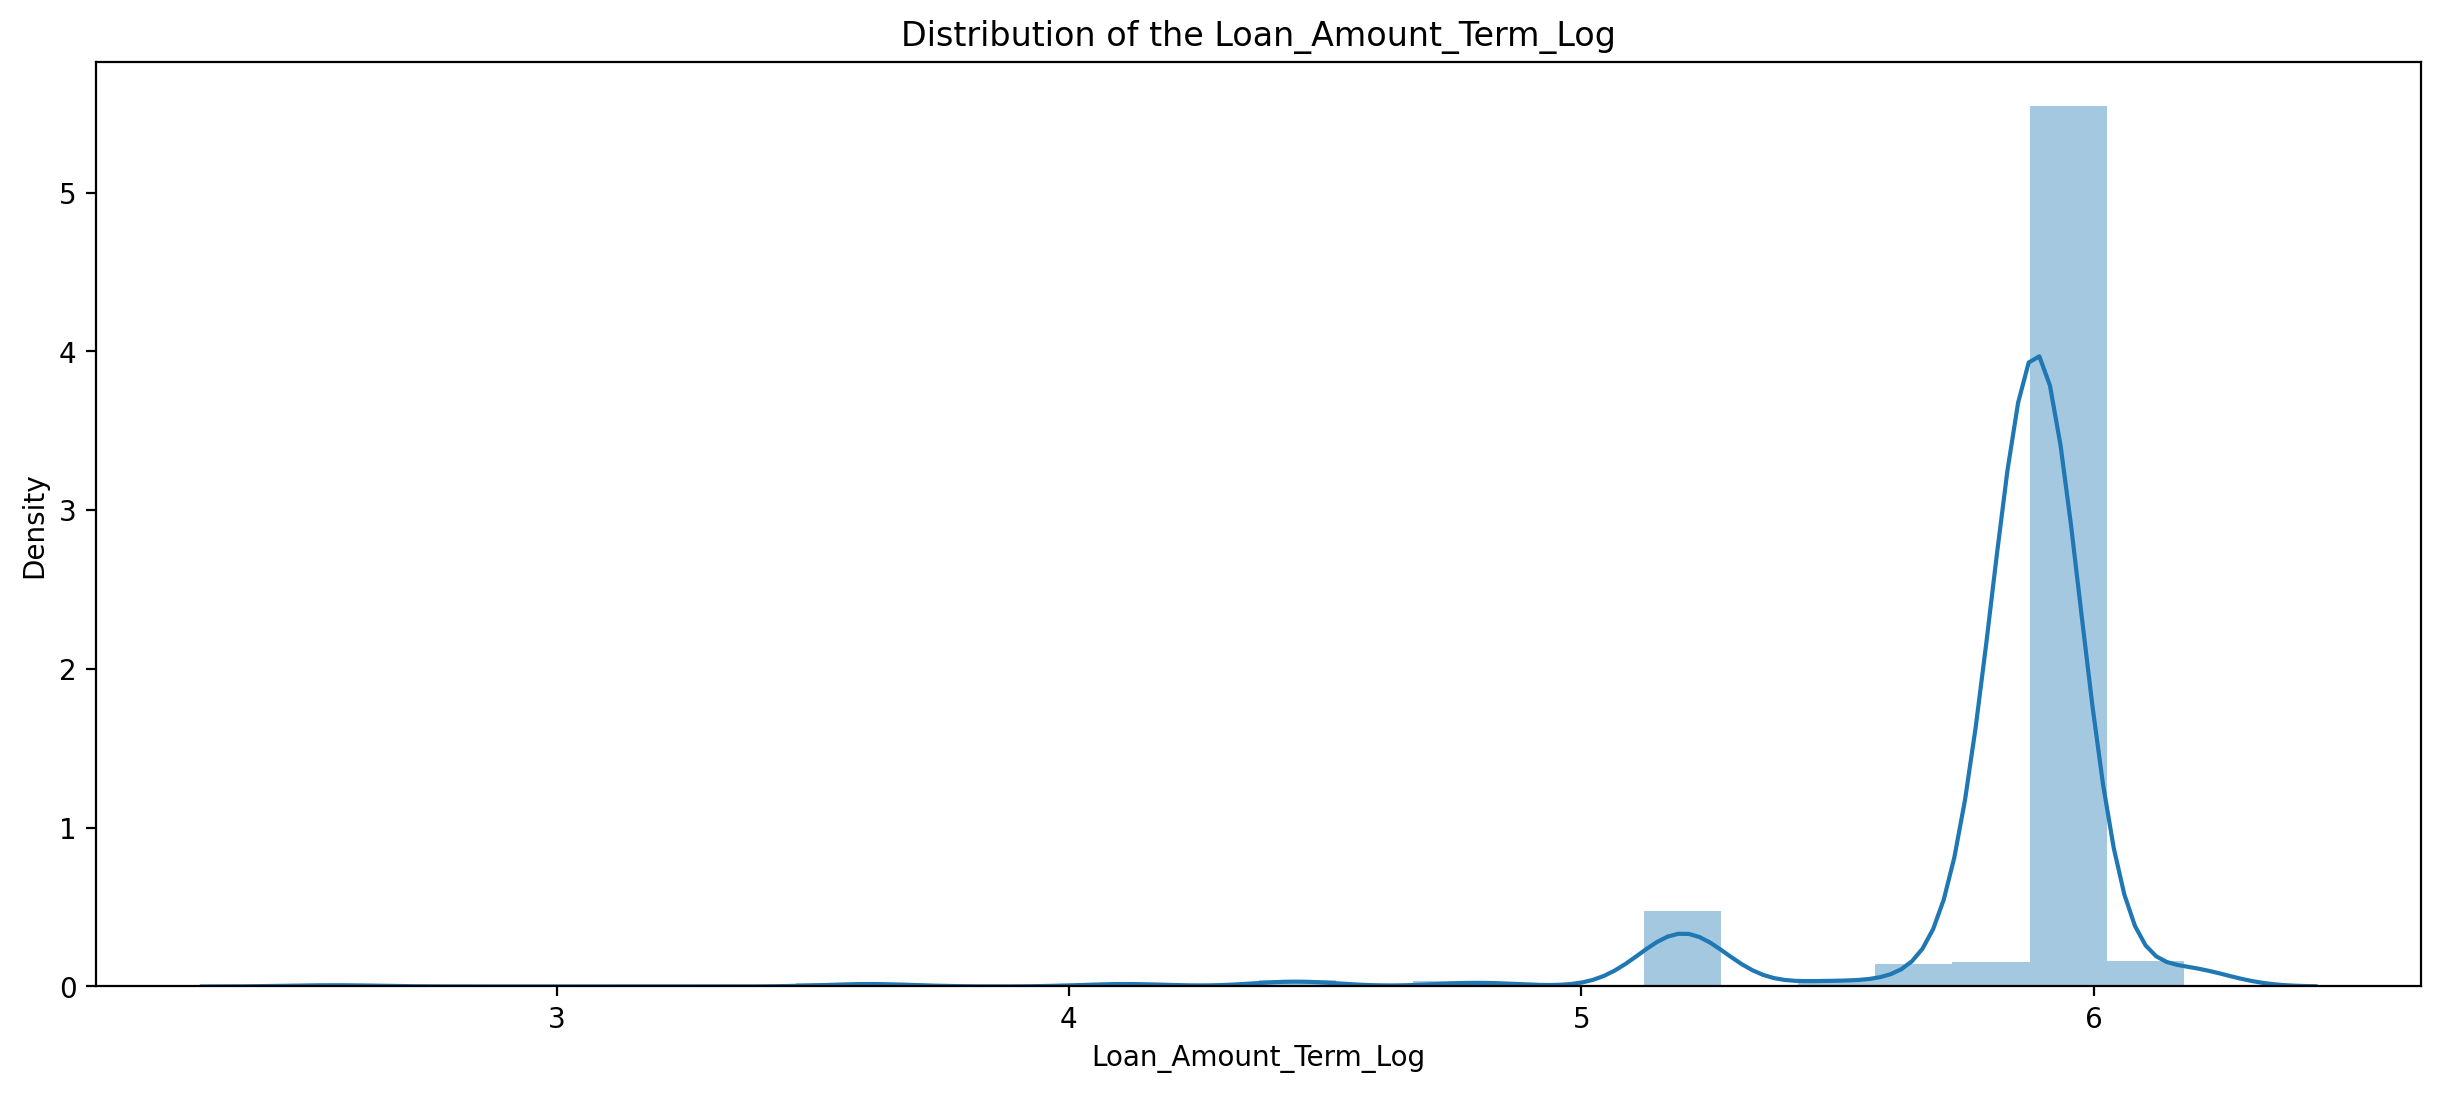

In [215]:
plt.figure(figsize= (15, 6), dpi = 200)
sns.distplot(loan['Loan_Amount_Term_Log'])
plt.title('Distribution of the Loan_Amount_Term_Log')

In [216]:
# Normalizing the Total Income feature
loan['Total_Income_Log'] = np.log(loan['Total Income'] + 1)

In [217]:
loan['Total_Income_Log']

0      8.674197
1      8.714732
2      8.006701
3      8.505525
4      8.699681
         ...   
609    7.972811
610    8.320448
611    9.025576
612    8.933796
613    8.430327
Name: Total_Income_Log, Length: 614, dtype: float64

Text(0.5, 1.0, 'Distribution of the Total_Income_Log')

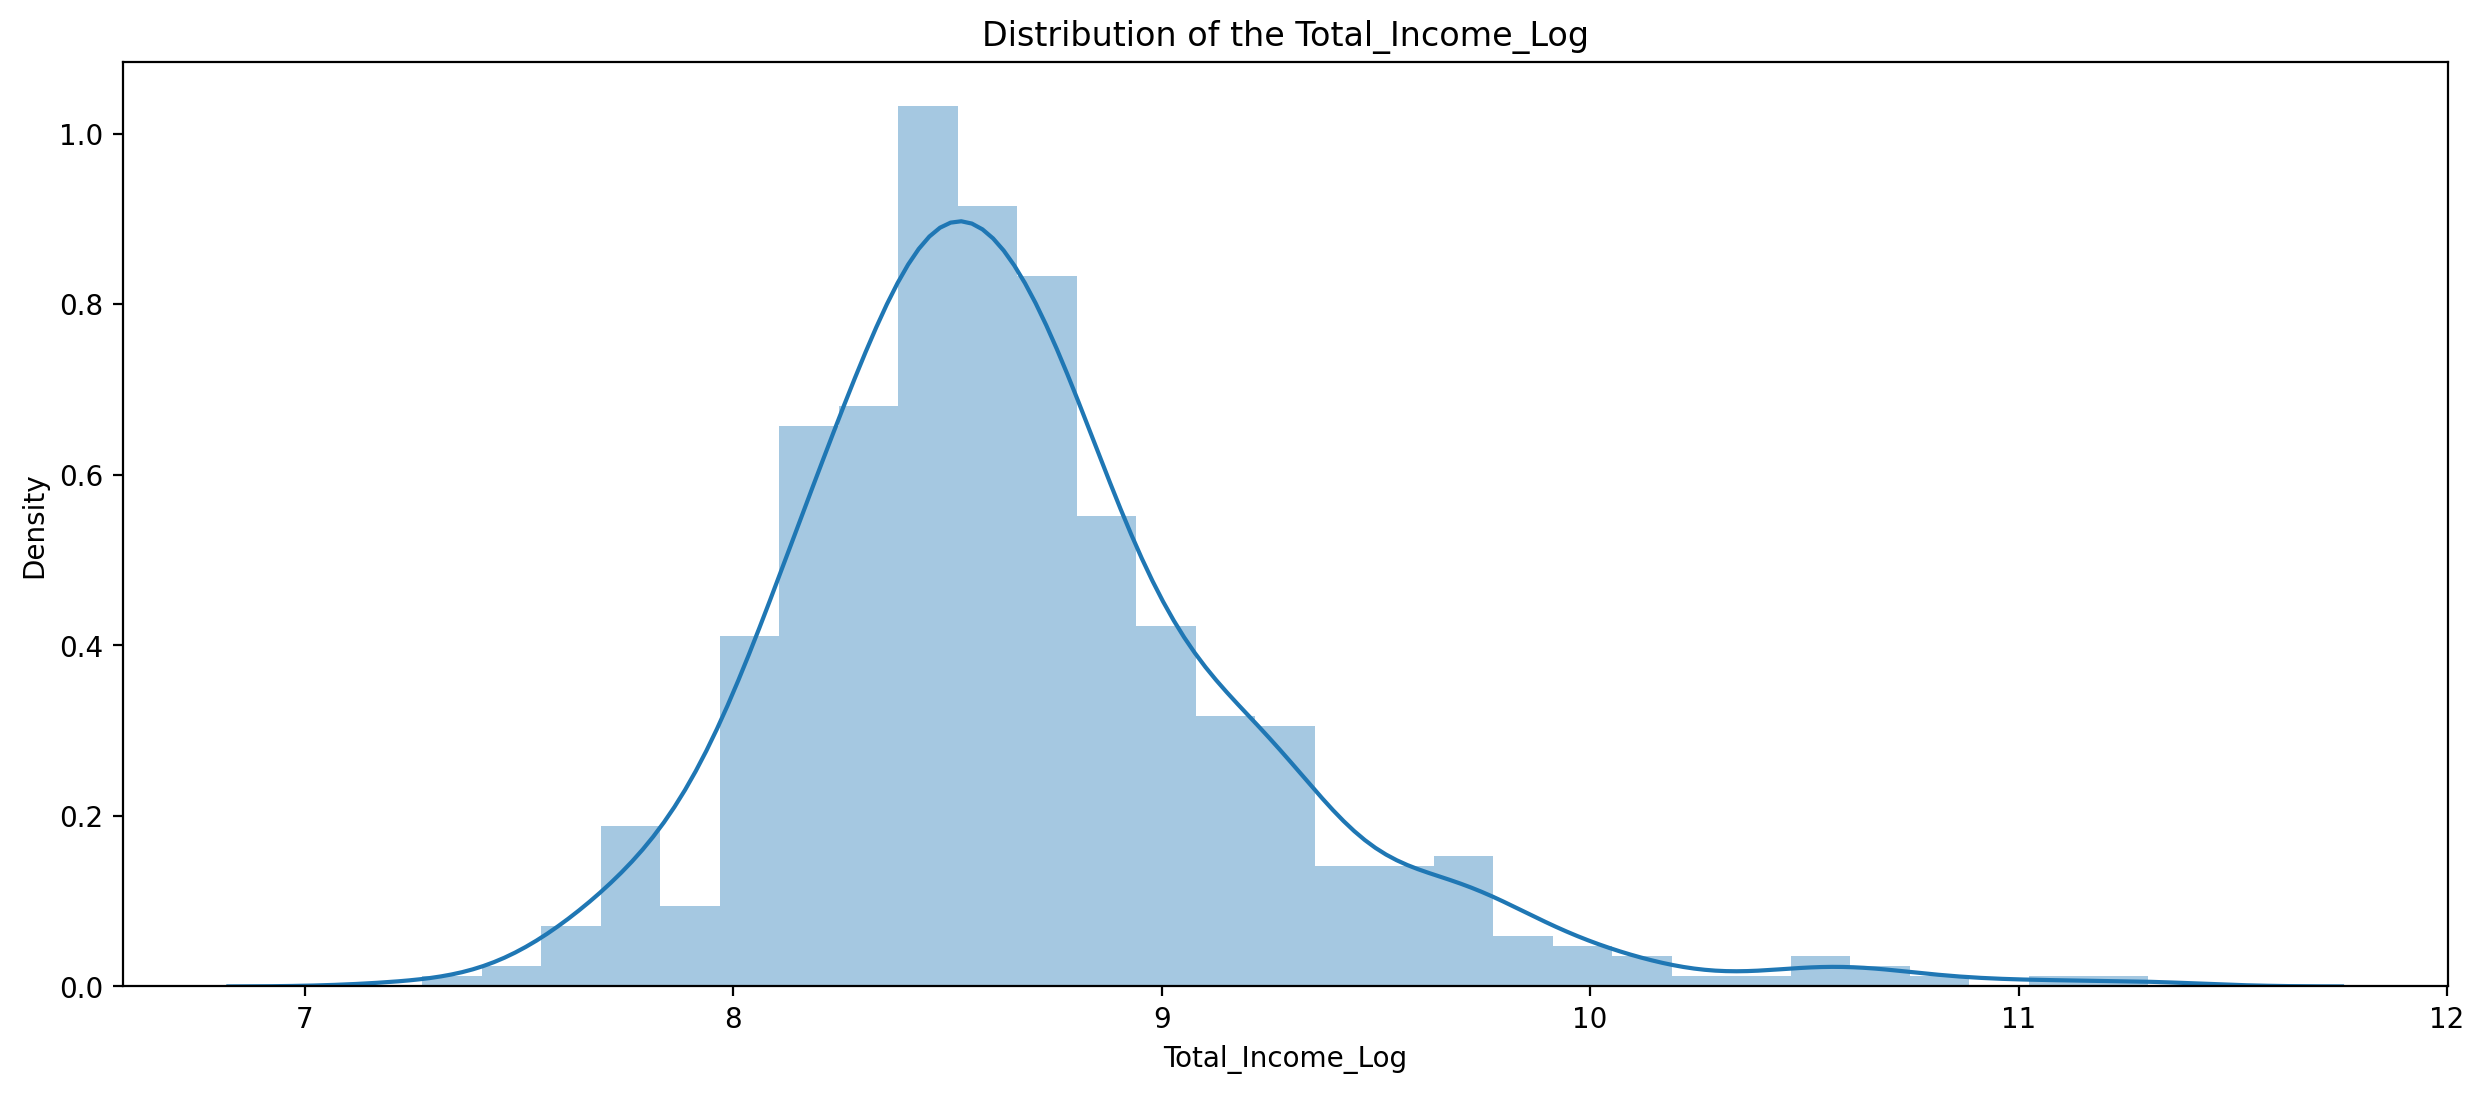

In [218]:
plt.figure(figsize= (15, 6), dpi = 200)
sns.distplot(loan['Total_Income_Log'])
plt.title('Distribution of the Total_Income_Log')

In [219]:
loan

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Total Income,ApplicantIncomLog,LoanAmountLog,Loan_Amount_Term_Log,Total_Income_Log
0,LP001002,Male,No,0,Graduate,No,5849,0.0,128.0,360.0,1.0,Urban,Y,5849.0,8.674197,4.859812,5.888878,8.674197
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N,6091.0,8.430327,4.859812,5.888878,8.714732
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y,3000.0,8.006701,4.204693,5.888878,8.006701
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y,4941.0,7.857094,4.795791,5.888878,8.505525
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y,6000.0,8.699681,4.955827,5.888878,8.699681
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y,2900.0,7.972811,4.276666,5.888878,7.972811
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y,4106.0,8.320448,3.713572,5.198497,8.320448
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y,8312.0,8.996280,5.537334,5.888878,9.025576
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y,7583.0,8.933796,5.236442,5.888878,8.933796


- Dropping unnecessary columns from the dataset which include the following columns;
   - 'ApplicantIncome',
 'CoapplicantIncome'
 'LoanAmount
 'Loan_Amount_Te,',
 'Total Incoe',
 'Loan_ID'

In [220]:
cols = ['ApplicantIncome','CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Total Income', 'Loan_ID']

In [221]:
cols

['ApplicantIncome',
 'CoapplicantIncome',
 'LoanAmount',
 'Loan_Amount_Term',
 'Total Income',
 'Loan_ID']

In [222]:
loan = loan.drop(columns = cols, axis = 1)

In [223]:
loan

,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area,Loan_Status,ApplicantIncomLog,LoanAmountLog,Loan_Amount_Term_Log,Total_Income_Log
0,Male,No,0,Graduate,No,1.0,Urban,Y,8.674197,4.859812,5.888878,8.674197
1,Male,Yes,1,Graduate,No,1.0,Rural,N,8.430327,4.859812,5.888878,8.714732
2,Male,Yes,0,Graduate,Yes,1.0,Urban,Y,8.006701,4.204693,5.888878,8.006701
3,Male,Yes,0,Not Graduate,No,1.0,Urban,Y,7.857094,4.795791,5.888878,8.505525
4,Male,No,0,Graduate,No,1.0,Urban,Y,8.699681,4.955827,5.888878,8.699681
...,...,...,...,...,...,...,...,...,...,...,...,...
609,Female,No,0,Graduate,No,1.0,Rural,Y,7.972811,4.276666,5.888878,7.972811
610,Male,Yes,3+,Graduate,No,1.0,Rural,Y,8.320448,3.713572,5.198497,8.320448
611,Male,Yes,1,Graduate,No,1.0,Urban,Y,8.996280,5.537334,5.888878,9.025576
612,Male,Yes,2,Graduate,No,1.0,Urban,Y,8.933796,5.236442,5.888878,8.933796


- Converting all the categorical data into numerical data using the encoding techniques (label encoding or on-hot encoding)

In [224]:
# Using the LabelEncoder technique

from sklearn.preprocessing import LabelEncoder

In [225]:
col_obj = ['Gender', 'Married', 'Education', 'Dependents', 'Self_Employed', 'Property_Area', 'Loan_Status']

In [227]:
le = LabelEncoder()

In [228]:
for col in col_obj:
    loan[col] = le.fit_transform(loan[col])

In [229]:
# Confirmthe dataset id the LabelEncoder has been implemented

loan

,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area,Loan_Status,ApplicantIncomLog,LoanAmountLog,Loan_Amount_Term_Log,Total_Income_Log
0,1,0,0,0,0,1.0,2,1,8.674197,4.859812,5.888878,8.674197
1,1,1,1,0,0,1.0,0,0,8.430327,4.859812,5.888878,8.714732
2,1,1,0,0,1,1.0,2,1,8.006701,4.204693,5.888878,8.006701
3,1,1,0,1,0,1.0,2,1,7.857094,4.795791,5.888878,8.505525
4,1,0,0,0,0,1.0,2,1,8.699681,4.955827,5.888878,8.699681
...,...,...,...,...,...,...,...,...,...,...,...,...
609,0,0,0,0,0,1.0,0,1,7.972811,4.276666,5.888878,7.972811
610,1,1,3,0,0,1.0,0,1,8.320448,3.713572,5.198497,8.320448
611,1,1,1,0,0,1.0,2,1,8.996280,5.537334,5.888878,9.025576
612,1,1,2,0,0,1.0,2,1,8.933796,5.236442,5.888878,8.933796


In [230]:
loan.dtypes

Gender                    int32
Married                   int32
Dependents                int32
Education                 int32
Self_Employed             int32
Credit_History          float64
Property_Area             int32
Loan_Status               int32
ApplicantIncomLog       float64
LoanAmountLog           float64
Loan_Amount_Term_Log    float64
Total_Income_Log        float64
dtype: object

- Seperating the dependent from the independent features

In [231]:
X = loan.drop('Loan_Status', axis = 1)

In [233]:
y = loan['Loan_Status']

In [234]:
X.head()

,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area,ApplicantIncomLog,LoanAmountLog,Loan_Amount_Term_Log,Total_Income_Log
0,1,0,0,0,0,1.0,2,8.674197,4.859812,5.888878,8.674197
1,1,1,1,0,0,1.0,0,8.430327,4.859812,5.888878,8.714732
2,1,1,0,0,1,1.0,2,8.006701,4.204693,5.888878,8.006701
3,1,1,0,1,0,1.0,2,7.857094,4.795791,5.888878,8.505525
4,1,0,0,0,0,1.0,2,8.699681,4.955827,5.888878,8.699681


In [235]:
y.head()

0    1
1    0
2    1
3    1
4    1
Name: Loan_Status, dtype: int32

- Importing other dependencies for the model

In [236]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, plot_confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

In [237]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25 , random_state = 42)

In [238]:
# Creating the model

model_one = LogisticRegression()

In [239]:
model_one.fit(X_train, y_train)

LogisticRegression()

In [240]:
loan_prediction_one = model_one.predict(X_test)

In [242]:
# Evaluating the model

accuracy_one = accuracy_score(y_test, loan_prediction_one)

In [243]:
print('Accuracy of the model in Percentage: ', accuracy_one*100)

Accuracy of the model in Percentage:  77.27272727272727


In [244]:
confusion_matrix(y_test, loan_prediction_one)

array([[21, 33],
       [ 2, 98]], dtype=int64)

In [245]:
# Using cross validation

score_one = cross_val_score(model_one, X, y, cv = 5)

In [246]:
score_one

array([0.81300813, 0.7804878 , 0.7804878 , 0.85365854, 0.81967213])

In [249]:
score_val_one = np.mean(score_one) * 100

In [250]:
score_val_one

80.9462881514061

In [281]:
# Decision Tree Classifier

model_two = DecisionTreeClassifier()

In [282]:
model_two.fit(X_train, y_train)

DecisionTreeClassifier()

In [283]:
loan_prediction_two = model_two.predict(X_test)

In [284]:
# loan_prediction

In [285]:
accuracy_two = accuracy_score(y_test, loan_prediction_two)

In [286]:
accuracy_two

0.7272727272727273

In [287]:
print('Accuracy of the model in Percentage: ', accuracy_two*100)

Accuracy of the model in Percentage:  72.72727272727273


In [288]:
 # Using cross validation

score_two = cross_val_score(model_two, X, y, cv = 5)

In [289]:
score_two

array([0.69105691, 0.69918699, 0.71544715, 0.74796748, 0.70491803])

In [290]:
score_val_two= np.mean(score_two) * 100

In [291]:
print('The Cross Validation for DecsionTree: ', score_val_two)

The Cross Validation for DecsionTree:  71.17153138744501


In [295]:
# RandomForestClassfier

model_three = RandomForestClassifier()

In [296]:
model_three.fit(X_train, y_train)

RandomForestClassifier()

In [297]:
loan_prediction_three = model_three.predict(X_test)

In [298]:
accuracy_three = accuracy_score(y_test, loan_prediction_three)

In [299]:
accuracy_three

0.7922077922077922

In [300]:
print('Accuracy of the model in Percentage: ', accuracy_three*100)

Accuracy of the model in Percentage:  79.22077922077922


In [301]:
# KNeighbors 

model_four = KNeighborsClassifier(n_neighbors = 3)

In [302]:
model_four.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [303]:
loan_prediction_four= model_four.predict(X_test)

In [304]:
accuracy_four = accuracy_score(y_test, loan_prediction_four)

In [305]:
print('Accuracy of the model in Percentage: ', accuracy_four*100)

Accuracy of the model in Percentage:  71.42857142857143


In [306]:
score_val_four = cross_val_score(model_four, X, y, cv = 3)

In [307]:
score_val_four

array([0.72195122, 0.75121951, 0.74509804])

In [308]:
score_val_four = np.mean(score_val_four) * 100

In [309]:
print('The Cross Validation for KNeighbors: ', score_val_four)

The Cross Validation for KNeighbors:  73.94229236410011


In [310]:
from sklearn.metrics import classification_report

In [311]:
def generate_classification_report(model_name, y_test, loan_prediction):
    report = classification_report(y_test, loan_prediction)
    print(f" Classification Report For {model_name}: \n{report}\n")

generate_classification_report(model_one, y_test, loan_prediction_one)
generate_classification_report(model_two, y_test, loan_prediction_two)
generate_classification_report(model_three, y_test, loan_prediction_three)
generate_classification_report(model_four, y_test, loan_prediction_four)  

 Classification Report For LogisticRegression(): 
              precision    recall  f1-score   support

           0       0.91      0.39      0.55        54
           1       0.75      0.98      0.85       100

    accuracy                           0.77       154
   macro avg       0.83      0.68      0.70       154
weighted avg       0.81      0.77      0.74       154


 Classification Report For DecisionTreeClassifier(): 
              precision    recall  f1-score   support

           0       0.63      0.54      0.58        54
           1       0.77      0.83      0.80       100

    accuracy                           0.73       154
   macro avg       0.70      0.68      0.69       154
weighted avg       0.72      0.73      0.72       154


 Classification Report For RandomForestClassifier(): 
              precision    recall  f1-score   support

           0       0.92      0.44      0.60        54
           1       0.77      0.98      0.86       100

    accuracy          

In [312]:
 # Value Count of the Loan_Status, if the the values are balance or not.

loan['Loan_Status'].value_counts()

1    422
0    192
Name: Loan_Status, dtype: int64

In [314]:
# To Balance the value of the dataset

from imblearn.over_sampling import RandomOverSampler

In [319]:
oversample = RandomOverSampler(random_state = 42)
X_resampled, y_resampled = oversample.fit_resample(X, y)

loan_resampled = pd.concat([pd.DataFrame(X_resampled, columns = X.columns), pd.Series(y_resampled, name='Loan_Status')], axis = 1)

In [320]:
X_resampled

,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area,ApplicantIncomLog,LoanAmountLog,Loan_Amount_Term_Log,Total_Income_Log
0,1,0,0,0,0,1.000000,2,8.674197,4.859812,5.888878,8.674197
1,1,1,1,0,0,1.000000,0,8.430327,4.859812,5.888878,8.714732
2,1,1,0,0,1,1.000000,2,8.006701,4.204693,5.888878,8.006701
3,1,1,0,1,0,1.000000,2,7.857094,4.795791,5.888878,8.505525
4,1,0,0,0,0,1.000000,2,8.699681,4.955827,5.888878,8.699681
...,...,...,...,...,...,...,...,...,...,...,...
839,1,1,3,1,0,1.000000,2,8.292298,4.859812,5.198497,8.292298
840,1,1,1,0,0,0.842199,0,7.539559,4.127134,5.888878,7.539559
841,1,1,1,0,0,0.000000,0,7.933080,4.990433,5.888878,8.456381
842,1,1,2,1,0,0.000000,2,7.969012,3.828641,5.198497,7.969012


In [321]:
y_resampled

0      1
1      0
2      1
3      1
4      1
      ..
839    0
840    0
841    0
842    0
843    0
Name: Loan_Status, Length: 844, dtype: int32

In [322]:
loan_resampled

,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area,ApplicantIncomLog,LoanAmountLog,Loan_Amount_Term_Log,Total_Income_Log,Loan_Status
0,1,0,0,0,0,1.000000,2,8.674197,4.859812,5.888878,8.674197,1
1,1,1,1,0,0,1.000000,0,8.430327,4.859812,5.888878,8.714732,0
2,1,1,0,0,1,1.000000,2,8.006701,4.204693,5.888878,8.006701,1
3,1,1,0,1,0,1.000000,2,7.857094,4.795791,5.888878,8.505525,1
4,1,0,0,0,0,1.000000,2,8.699681,4.955827,5.888878,8.699681,1
...,...,...,...,...,...,...,...,...,...,...,...,...
839,1,1,3,1,0,1.000000,2,8.292298,4.859812,5.198497,8.292298,0
840,1,1,1,0,0,0.842199,0,7.539559,4.127134,5.888878,7.539559,0
841,1,1,1,0,0,0.000000,0,7.933080,4.990433,5.888878,8.456381,0
842,1,1,2,1,0,0.000000,2,7.969012,3.828641,5.198497,7.969012,0


In [323]:
y_resampled.value_counts()

1    422
0    422
Name: Loan_Status, dtype: int64

In [324]:
X_resampled_train, X_resampled_test, y_resampled_train, y_resampled_test = train_test_split(X_resampled, y_resampled, test_size = 0.25 , random_state = 42)

In [331]:
# LogisticRegression Model

model_one = LogisticRegression()

In [332]:
model_one.fit(X_resampled_train, y_resampled_train)

LogisticRegression()

In [333]:
loan_prediction_one = model_one.predict(X_resampled_test)

In [334]:
# loan_prediction_one

In [335]:
# Evaluating the model
accuracy_one = accuracy_score(y_resampled_test, loan_prediction_one)

In [336]:
accuracy_one

0.6966824644549763

In [337]:
print(f"Accuracy of the model in Percentage: {accuracy_one*100} %")

Accuracy of the model in Percentage: 69.66824644549763 %


In [338]:
# DecsionTree Model

model_two = DecisionTreeClassifier()

In [339]:
model_two.fit(X_resampled_train, y_resampled_train)

DecisionTreeClassifier()

In [340]:
loan_prediction_two = model_two.predict(X_resampled_test)

In [341]:
# loan_prediction_two

In [342]:
accuracy_two = accuracy_score(y_resampled_test, loan_prediction_two)

In [343]:
accuracy_two

0.7819905213270142

In [344]:
print(f"Accuracy Score of the Model: {accuracy_two * 100} %")

Accuracy Score of the Model: 78.19905213270142 %


In [345]:
# Random Forest Model

model_three = RandomForestClassifier()

In [346]:
model_three.fit(X_resampled_train, y_resampled_train)

RandomForestClassifier()

In [347]:
loan_prediction_three = model_three.predict(X_resampled_test)

In [348]:
# loan_prediction_three

In [349]:
accuracy_three = accuracy_score(y_resampled_test, loan_prediction_three)

In [350]:
accuracy_three

0.8862559241706162

In [351]:
print(f"Accuracy Score of the Model: {accuracy_three * 100} %")

Accuracy Score of the Model: 88.62559241706161 %


In [352]:
# KNeighbors Model

model_four = KNeighborsClassifier(n_neighbors = 3)

In [353]:
model_four.fit(X_resampled_train, y_resampled_train)

KNeighborsClassifier(n_neighbors=3)

In [354]:
loan_prediction_four = model_four.predict(X_resampled_test)

In [355]:
accuracy_four = accuracy_score(y_resampled_test, loan_prediction_four)

In [356]:
accuracy_four

0.7251184834123223

In [357]:
print(f"Accuracy Score of the Model: {accuracy_four * 100} %")

Accuracy Score of the Model: 72.51184834123224 %


In [358]:
def generate_classification_report(model_name, y_test, loan_prediction):
    report = classification_report(y_test, loan_prediction)
    print(f" Classification Report For {model_name}: \n{report}\n")

generate_classification_report(model_one,y_resampled_test, loan_prediction_one)
generate_classification_report(model_two, y_resampled_test, loan_prediction_two)
generate_classification_report(model_three, y_resampled_test, loan_prediction_three)
generate_classification_report(model_four, y_resampled_test, loan_prediction_four)

 Classification Report For LogisticRegression(): 
              precision    recall  f1-score   support

           0       0.85      0.54      0.66       114
           1       0.62      0.89      0.73        97

    accuracy                           0.70       211
   macro avg       0.73      0.71      0.69       211
weighted avg       0.74      0.70      0.69       211


 Classification Report For DecisionTreeClassifier(): 
              precision    recall  f1-score   support

           0       0.77      0.85      0.81       114
           1       0.80      0.70      0.75        97

    accuracy                           0.78       211
   macro avg       0.78      0.78      0.78       211
weighted avg       0.78      0.78      0.78       211


 Classification Report For RandomForestClassifier(): 
              precision    recall  f1-score   support

           0       0.92      0.87      0.89       114
           1       0.85      0.91      0.88        97

    accuracy          

## Final Model

In [374]:
final_model = RandomForestClassifier()

In [375]:
final_model.fit(X_resampled, y_resampled)

RandomForestClassifier()

In [385]:
prediction = final_model.predict(X_resampled_test)

In [365]:
# final_prediction

In [394]:
accuracy = accuracy_score(y_resampled_test, prediction)

In [395]:
accuracy

1.0

In [377]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [387]:
final_MAE = mean_absolute_error(y_resampled_test, prediction)

In [388]:
final_MAE

0.0

In [389]:
from sklearn.model_selection import cross_val_score

In [390]:
# Perform 5-fold cross-validation
mae_cv = cross_val_score(final_model, X_resampled_train, y_resampled_train, scoring='neg_mean_absolute_error', cv=5)

In [391]:
# Convert negative MAE to positive
mae_cv = -mae_cv

In [392]:
# Calculate the mean MAE from cross-validation
mae_cv_mean = np.mean(mae_cv)

In [393]:
print(f"Mean MAE from Cross-Validation: {mae_cv_mean}")

Mean MAE from Cross-Validation: 0.14850643669541308


In [396]:
cm = confusion_matrix(y_resampled_test, prediction)
print(cm)

[[114   0]
 [  0  97]]


In [399]:
import joblib

In [400]:
# Saving the model

joblib.dump(final_model, 'loan_model.pkl')

['loan_model.pkl']

In [401]:
model = joblib.load('loan_model.pkl')

In [402]:
model

RandomForestClassifier()

## Making Predictions on the New Test Set

In [407]:
model.predict([[1,	0,	0,	0,	0,	1.000000,	2,	8.674197,	4.859812,	5.888878,	8.674197]])

array([1])

In [408]:
model.predict([[1, 1, 1, 0, 0, 1.000000, 0,	8.430327, 4.859812,	5.888878, 8.714732,]])	

array([0])

In [415]:
model.predict([[1, 0,	0,	1,	0,	1.000000,	2,	7.857094,	4.795791,	5.888878,	8.505525]])

array([1])